In [44]:
import torch
#import matplotlib.pyplot as plt
from model import *
from others.helpers import *

%reload_ext autoreload
%autoreload 2

Import images, sample and transform into float (to correspond to model)

In [45]:
noisy_imgs_1, noisy_imgs_2 = torch.load('../data/train_data.pkl')
noisy_imgs_1, noisy_imgs_2 = noisy_imgs_1.float()/255, noisy_imgs_2.float()/255

img_samples_1, img_samples_2 = noisy_imgs_1[:100], noisy_imgs_2[:100]
print(img_samples_1.shape, img_samples_2.shape)

torch.Size([100, 3, 32, 32]) torch.Size([100, 3, 32, 32])


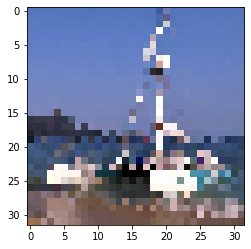

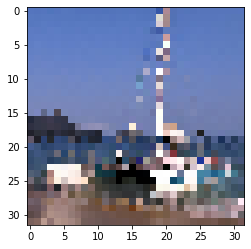

In [46]:
import matplotlib.pyplot as plt
idx = 60
plt.imshow(img_samples_1[idx,:,:,:].permute(1,2,0))
plt.show()
plt.imshow(img_samples_2[idx,:,:,:].permute(1,2,0))
plt.show()

Parameters

In [47]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [48]:
# architecture
in_channels = out_channels = noisy_imgs_1.shape[1]
conv_by_level = 2
features = [16,32,64]
pooling_type = 'max'
batch_norm = True
dropout = 0
model_ARGS = [in_channels, out_channels, conv_by_level, features, pooling_type, batch_norm, dropout]

# training
optimizer = 'SGD' #torch.optim.SGD(Model.parameters(), lr=0.01, momentum = 0.9) 
loss_func = nn.MSELoss().to(DEVICE) #psnr loss provided in the pdf ? It's in the others/helpers.py # nn.lL1Loss()
batch_size = 10
num_epoch = 5
train_ARGS = [optimizer, loss_func, batch_size, num_epoch]

# control arg
shape_control = True

Model test

In [49]:
Noise2noise = Model().to(DEVICE)
Noise2noise = Model(model_ARGS, train_ARGS, shape_control)
Noise2noise(img_samples_1)
print('Forward pass done.')

Original shape: torch.Size([100, 3, 32, 32])
Level 1: conv shape: torch.Size([100, 16, 32, 32]), pooled shape: torch.Size([100, 16, 16, 16])
Level 2: conv shape: torch.Size([100, 32, 16, 16]), pooled shape: torch.Size([100, 32, 8, 8])
Level 3: conv shape: torch.Size([100, 64, 8, 8]), pooled shape: torch.Size([100, 64, 4, 4])
Deepest shape: torch.Size([100, 128, 4, 4])
Level 3: upscaled shape: torch.Size([100, 64, 8, 8]), concat shape: torch.Size([100, 128, 8, 8]), conv shape: torch.Size([100, 64, 8, 8])
Level 2: upscaled shape: torch.Size([100, 32, 16, 16]), concat shape: torch.Size([100, 64, 16, 16]), conv shape: torch.Size([100, 32, 16, 16])
Level 1: upscaled shape: torch.Size([100, 16, 32, 32]), concat shape: torch.Size([100, 32, 32, 32]), conv shape: torch.Size([100, 16, 32, 32])
Final shape: torch.Size([100, 3, 32, 32])
Forward pass done.


In [50]:
Noise2noise = Model(model_ARGS, train_ARGS, shape_control=False)

In [51]:
output = Noise2noise.train(img_samples_1, img_samples_2)


Things will go much quicker if you enable a GPU
Batch 5 : 0.48 sec
Epoch [1/5], Train loss: 0.2042 Validation loss: 0.0581
=> Saving checkpoint
Batch 5 : 0.45 sec
Epoch [2/5], Train loss: 0.0802 Validation loss: 0.0572
=> Saving checkpoint
Batch 5 : 0.45 sec
Epoch [3/5], Train loss: 0.0551 Validation loss: 0.1862
Batch 5 : 0.43 sec
Epoch [4/5], Train loss: 0.0371 Validation loss: 0.0792
Batch 5 : 0.42 sec
Epoch [5/5], Train loss: 0.0349 Validation loss: 0.0965
Training finished with best best results at epoch 2 | Training loss : 0.0802 | Validation loss : 0.0572 


In [52]:
Noise2noise.load_pretrained_model()

=> Loading checkpoint from a trained model at the best epoch 2


In [53]:
noisy_test , clean_test = torch.load ('../data/val_data.pkl')
noisy_test, clean_test = noisy_test.float()/255, clean_test.float()/255
noisy_test_sample,  clean_test_sample = noisy_test[:100], clean_test[:100]

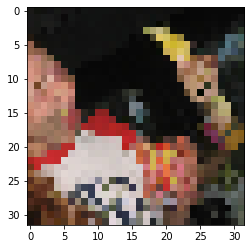

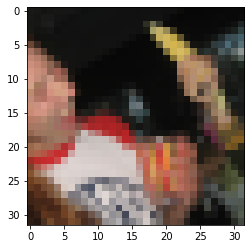

In [54]:
import matplotlib.pyplot as plt
idx = 90
plt.imshow(noisy_test_sample[idx,:,:,:].permute(1,2,0))
plt.show()
plt.imshow(clean_test_sample[idx,:,:,:].permute(1,2,0))
plt.show()

In [55]:
test_output = Noise2noise.predict(noisy_test_sample)

In [56]:
print(psnr(test_output, clean_test_sample))

tensor(12.6766)


In [57]:
plot_img_end(denoised=test_output, ground_truth=clean_test_sample)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
